# Anomaly detection


In [76]:
# Imports
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings

### create data frame 

In [77]:
df = pd.read_csv("conn250k.csv",names=["record ID", "duration", "src_bytes", "dst_bytes"], header=None)

In [78]:
df

,record ID,duration,src_bytes,dst_bytes
0,1,0,236,1228
1,2,0,239,486
2,3,0,234,1364
3,4,0,239,1295
4,5,0,181,5450
...,...,...,...,...
256665,256666,0,306,236
256666,256667,0,288,4017
256667,256668,0,289,1096
256668,256669,0,198,2169


### test how the 'src_bytes' data look

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


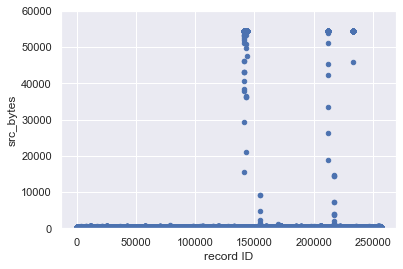

In [79]:
# we can find something interesting in the 'src_bytes'
var = 'record ID'
data = pd.concat([df['src_bytes'], df[var]], axis=1)
data.plot.scatter(x=var, y='src_bytes', ylim=(0,60000)); 

In [80]:
# high 'src_bytes' when 'duration' is 0
df.where(df['src_bytes'] > 20000).dropna()

,record ID,duration,src_bytes,dst_bytes
140814,140815.0,0.0,54540.0,8314.0
140815,140816.0,0.0,54540.0,8314.0
140816,140817.0,0.0,54540.0,8314.0
140817,140818.0,0.0,54540.0,8314.0
140818,140819.0,0.0,54540.0,8314.0
...,...,...,...,...
232764,232765.0,0.0,54540.0,8314.0
232765,232766.0,0.0,54540.0,8314.0
232766,232767.0,0.0,54540.0,8314.0
232767,232768.0,0.0,54540.0,8314.0


### test how the 'dst_bytes' data look 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


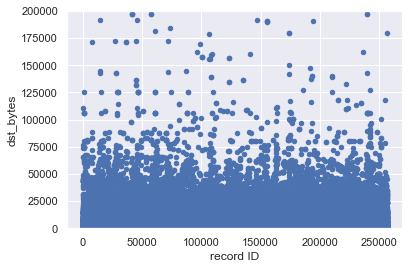

In [81]:
# we can't learn nothing from 'dst_bytes'
var = 'record ID'
data = pd.concat([df['dst_bytes'], df[var]], axis=1)
data.plot.scatter(x=var, y='dst_bytes', ylim=(0,200000)); 

### test the relation between 'src_bytes' and 'dst_bytes' 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


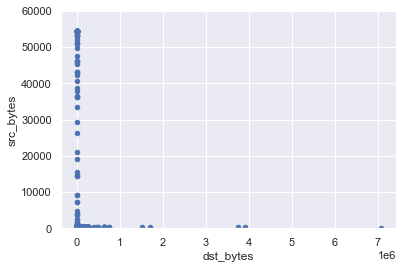

In [82]:
# x = 'dst_bytes'
# y = 'src_bytes'
var = 'dst_bytes'
data = pd.concat([df['src_bytes'], df[var]], axis=1)
data.plot.scatter(x=var, y='src_bytes', ylim=(0,60000)); 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


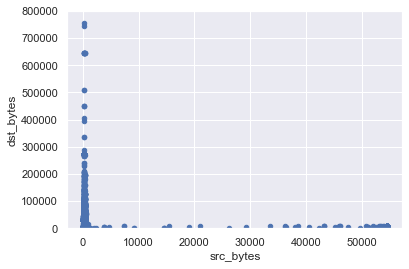

In [83]:
# x = 'src_bytes'
# y = 'dst_bytes'
var = 'src_bytes'
data = pd.concat([df['dst_bytes'], df[var]], axis=1)
data.plot.scatter(x=var, y='dst_bytes', ylim=(0,800000)); 

### test the relation between 'src_bytes' and 'duration' 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


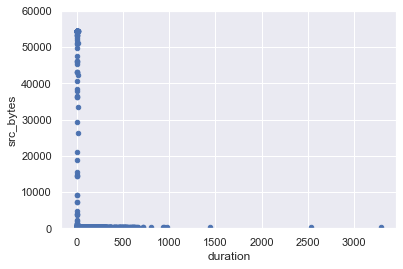

In [84]:
# when the 'duration' is 0 there is anomaly in 'src_bytes' as we discovered before
var = 'duration'
data = pd.concat([df['src_bytes'], df[var]], axis=1)
data.plot.scatter(x=var, y='src_bytes', ylim=(0,60000)); 

## Selecting the features 

In [85]:
# we will use 'duration' and 'src_bytes' as our features

x = df.iloc[:,[1,2]] # 1t for rows and second for columns


In [86]:
x


,duration,src_bytes
0,0,236
1,0,239
2,0,234
3,0,239
4,0,181
...,...,...
256665,0,306
256666,0,288
256667,0,289
256668,0,198


## Clustering using K means algorithm

In [87]:
from sklearn.cluster import KMeans
# we want 2 groups: outlier/anomaly 
kmeans = KMeans(2)
kmeans.fit(x)

KMeans(n_clusters=2)

### Clustering Results 

In [88]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([0, 0, 0, ..., 0, 0, 0])

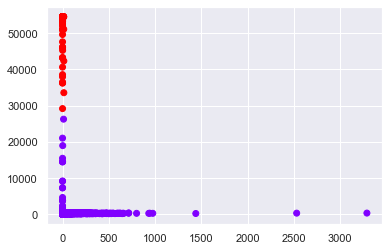

In [89]:
data_with_clusters = df.copy()

data_with_clusters['Clusters'] = identified_clusters 
plt.scatter(data_with_clusters['duration'],data_with_clusters['src_bytes'],c=data_with_clusters['Clusters'],cmap='rainbow')

### create data frame of our prediction 

In [90]:
prediction = pd.DataFrame()
prediction['prediction'] = identified_clusters.tolist()
# prediction = identified_clusters.tolist()

In [91]:
prediction

,prediction
0,0
1,0
2,0
3,0
4,0
...,...
256665,0
256666,0
256667,0
256668,0


In [92]:
# check were our model predict anomaly
prediction.where(prediction['prediction'] > 0).dropna()

,prediction
140814,1.0
140815,1.0
140816,1.0
140817,1.0
140818,1.0
...,...
232764,1.0
232765,1.0
232766,1.0
232767,1.0


In [93]:
# write the our prediction data frame to csv file
prediction.to_csv('predict.csv', sep='\t')

In [94]:
# read the real labels from csv file

labels = [0,1]   # our labels are 0 and 1

real_labels = pd.read_csv("conn250k_anomaly.csv",names=["label"], header=None)
real_labels

,label
1,0
2,0
3,0
4,0
5,0
...,...
256666,0
256667,0
256668,0
256669,0


In [95]:
# Compute confusion matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(real_labels, prediction, labels=labels)
cm

array([[255647,      1],
       [    10,   1012]], dtype=int64)

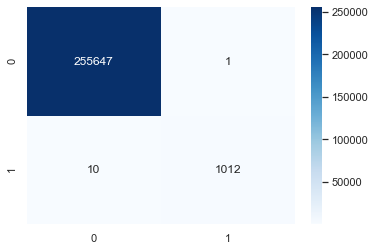

In [96]:
ax = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

In [97]:
# method to compute accuracy from confusion matrix
np.trace(cm) / np.sum(cm)


0.9999571434137219

In [98]:
# compute accuracy only of anomaly data
cm[0][0] = 0
cm[0][1] = 0
np.trace(cm) / np.sum(cm)


0.9902152641878669

## Summary of data exploration and learning 

1. Data exploration: 

   the first step was to reaserch how each data feature look,
   and to find anomaly.
   after finding anomaly in 'src_bytes' (high number of bytes in spesific range)
   we try to find if there is another feature which have some effect on the high
   number of 'src_bytes'.
   and it seems that there is high 'src_bytes' when the 'duration' is 0,
   that is the reason we choose to use these 2 features ('src_bytes' and 'duration')
   for the learning process.
   
   
2. Learning algorithms:

   unsuprevised learning algorithms are suitable for anomaly detection,
   because there is not label data to use in the learning process.
   in our case we use 'clustering algorithm' K-Means.
   
   
3. Solution report:

   The first thing we had to do is choose the features from the data,
   after the data exploration stage we decided to use 'src_bytes' and 'duration'
   as our features.
   we choose the clustering algorithm K-Means, after exploring on the internet
   we found that K-Means can give good results in unsuprevised learning and 
   in anomaly detection task.
   in our case we have 2 clusters because we want to find from the data what is normal
   and what is anomaly.
   
   Results:
   
   we can see in the Confusion matrix that 1012 anomaly data classify correct
   and only 10 anomaly data classify as normal data.
   

## Create final csv file (original data, predicted label, real label) 

In [99]:

final_data = df.join(prediction)
final_data = final_data.join(real_labels)

final_data = final_data.fillna(0)
final_data.set_index('record ID', inplace=True)

final_data

,duration,src_bytes,dst_bytes,prediction,label
record ID,,,,,
1,0,236,1228,0,0.0
2,0,239,486,0,0.0
3,0,234,1364,0,0.0
4,0,239,1295,0,0.0
5,0,181,5450,0,0.0
...,...,...,...,...,...
256666,0,306,236,0,0.0
256667,0,288,4017,0,0.0
256668,0,289,1096,0,0.0


In [100]:
# write the final data to csv file

final_data.to_csv('final_data.csv')